In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import os
import multiprocessing as mp
from tqdm import tqdm

In [2]:
train_file_list = np.loadtxt(fname="./train.txt", dtype=str)
val_file_list = np.loadtxt(fname="./val.txt", dtype=str)
test_file_list = np.loadtxt(fname="./test.txt", dtype=str)

In [3]:
train_label = train_file_list[:, 1].astype(int)
val_label = val_file_list[:, 1].astype(int)
test_label = test_file_list[:, 1].astype(int)

train_file_list = train_file_list[:, 0].tolist()
val_file_list = val_file_list[:, 0].tolist()
test_file_list = test_file_list[:, 0].tolist()

In [4]:
print("# cpus: ", os.cpu_count())

# cpus:  64


In [5]:
NUM_PROCESSES = 8
pool = mp.Pool(processes=NUM_PROCESSES)

In [6]:
def ReadImage(filePath):
    image = cv2.imread(filePath, cv2.IMREAD_COLOR)
    return image

In [11]:
train_imgs = pool.map(ReadImage, tqdm(train_file_list))
val_imgs = pool.map(ReadImage, tqdm(val_file_list))
test_imgs = pool.map(ReadImage, tqdm(test_file_list))

100%|██████████| 450/450 [00:00<00:00, 113277.93it/s]


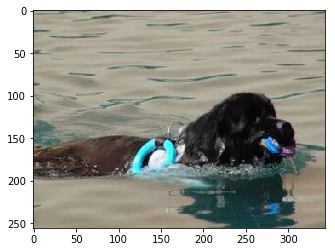

In [12]:
plt.imshow(train_imgs[0]);